In [5]:
import numpy as np
from chainercv.datasets import VOCDetectionDataset
from chainercv import transforms


def _shape_soft_min_hard_max(img_shape, soft_min, hard_max):
    lengths = np.array(img_shape).astype(np.float)
    min_length = np.min(lengths)
    scale = float(soft_min) / min_length
    lengths *= scale

    max_length = np.max(lengths)
    if max_length > hard_max:
        lengths *= float(hard_max) / max_length
    out_shape = (int(np.asscalar(lengths[0])),
                 int(np.asscalar(lengths[1])))
    return out_shape


train_data = VOCDetectionDataset(mode='train', use_cache=True, year='2007')

def transform(in_data):
    img, bbox = in_data
    # img -= np.array([103.939, 116.779, 123.68])[:, None, None]

    # Resize bounding box to a shape
    # with the smaller edge at least at length 600
    input_shape = img.shape[1:]
    output_shape = _shape_soft_min_hard_max(input_shape, 600, 1200)
    img = transforms.resize(img, output_shape)
    bbox = transforms.bbox_resize(bbox, input_shape, output_shape)

    # horizontally flip
    img, flips = transforms.random_flip(
        img, horizontal_flip=True, return_flip=True)
    h_flip = flips['h']
    bbox = transforms.bbox_flip(bbox, output_shape, h_flip)
    return img, bbox

transforms.extend(train_data, transform)

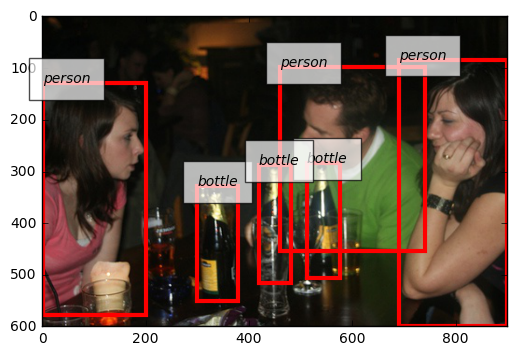

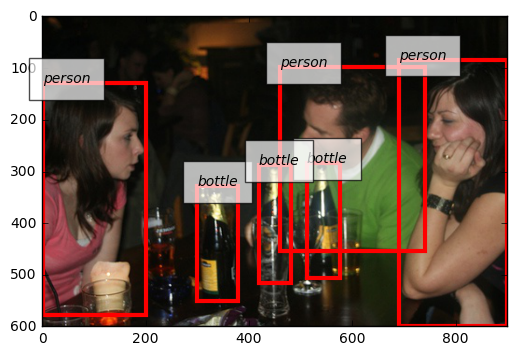

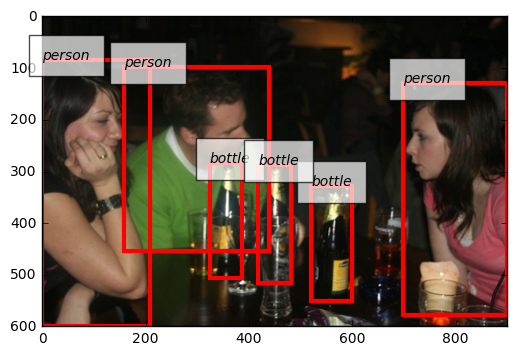

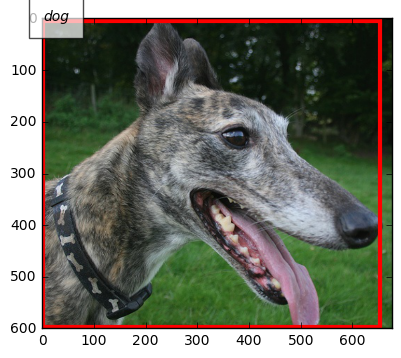

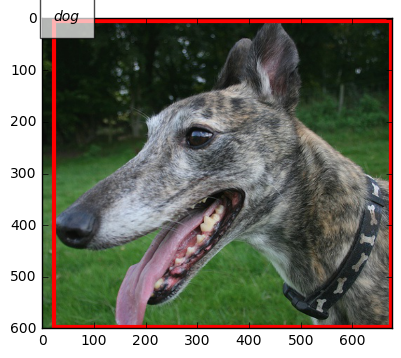

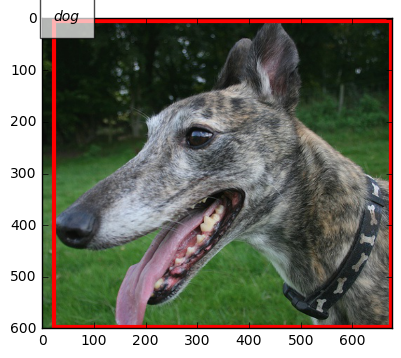

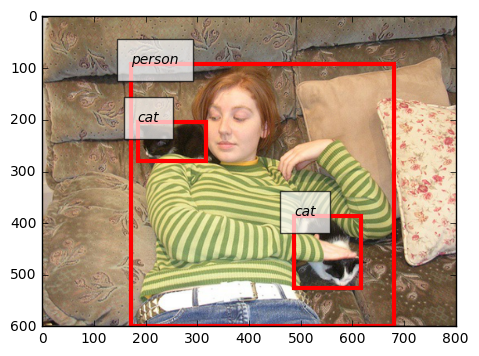

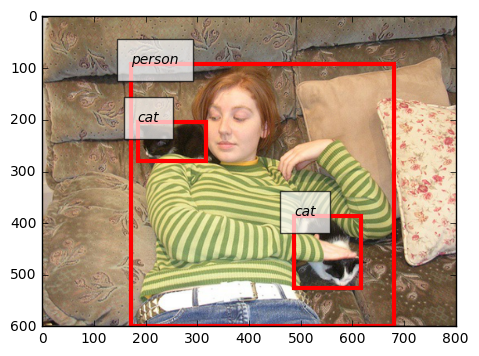

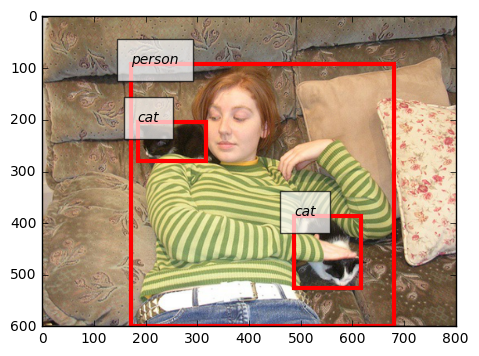

In [9]:

for k in range(40, 43):
    for i in range(3):
        img, bboxes = train_data.get_example(k)
        img = img.transpose(1, 2, 0)
        img = img[:, :, ::-1].astype(np.uint8)
        from chainercv.tasks.detection import vis_img_bbox
        import matplotlib.pyplot as plt
        # plt.imshow(img)
        # plt.show()
        vis_img_bbox(img, bboxes, train_data.labels)
        plt.show()